In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

### Data preparation

In [3]:
data = pd.read_csv('train.csv')
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
data.shape

(1000, 12)

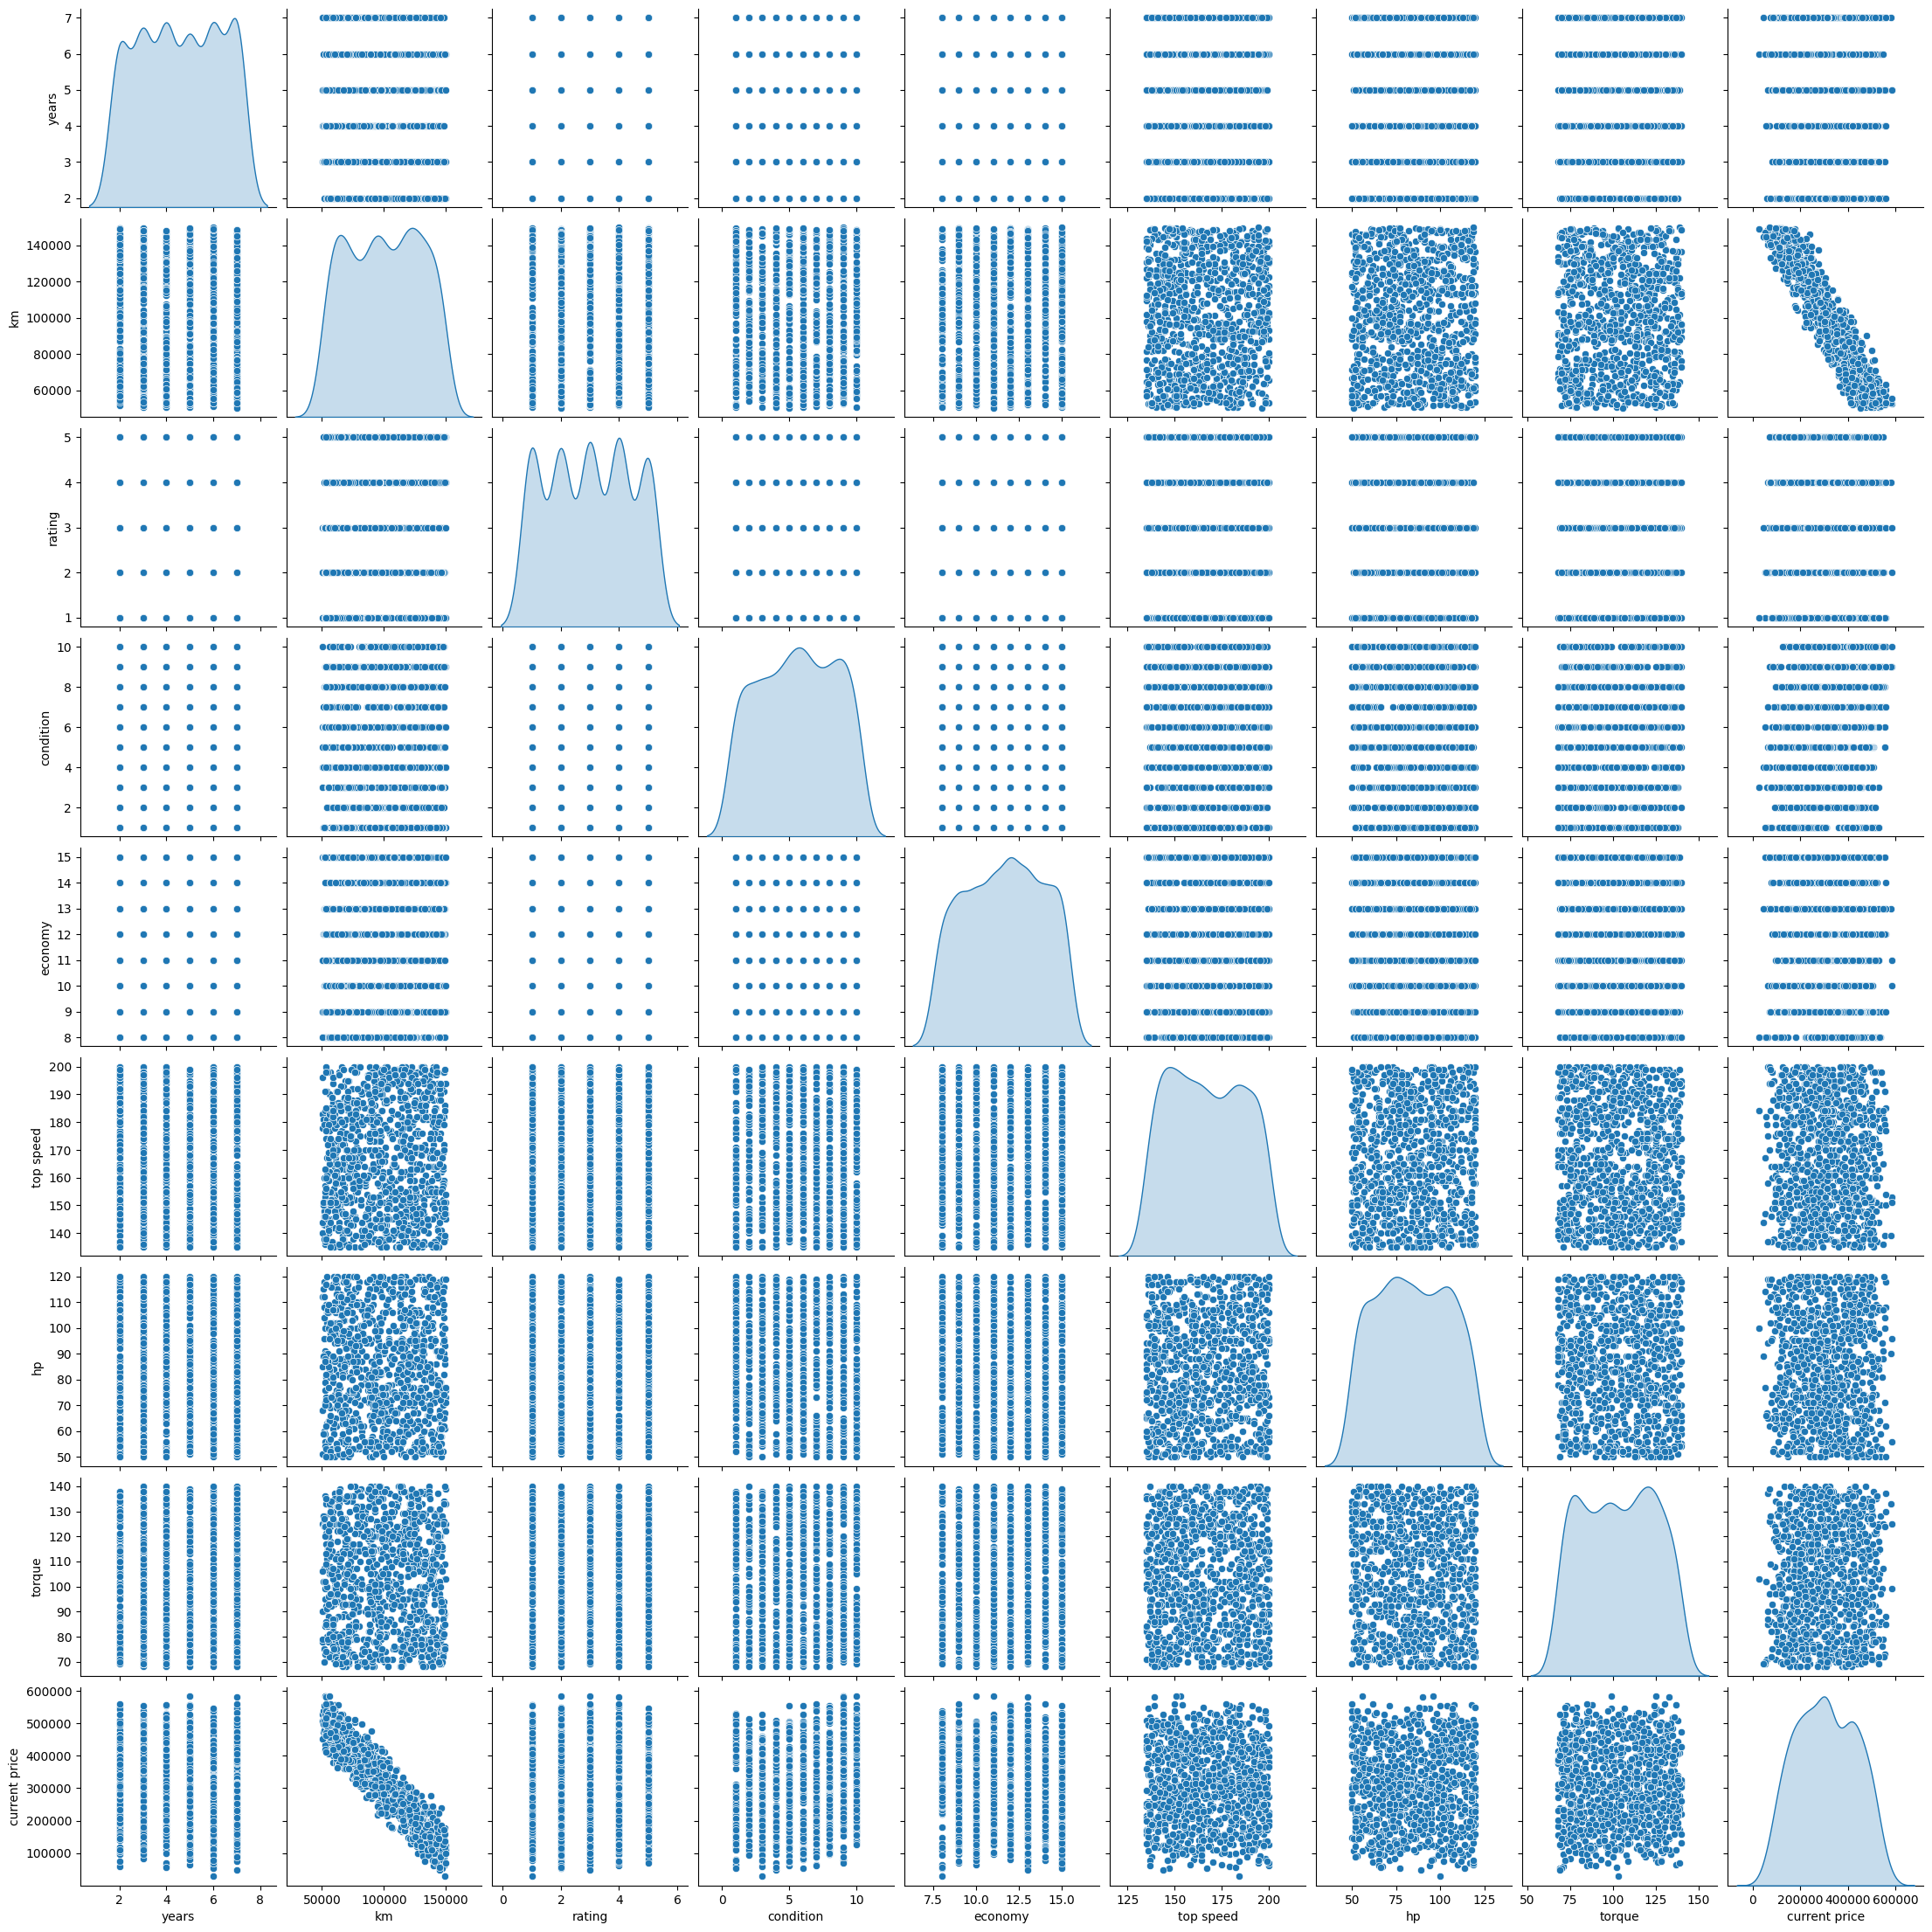

In [5]:
sns.pairplot(data[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp',	'torque', 'current price']], diag_kind='kde')

In [71]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, dtype=tf.float32)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [72]:
tensor_data = tf.random.shuffle(tensor_data)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.380000e+02, 5.210230e+05, 7.130000e+05, ..., 5.700000e+01,
        1.260000e+02, 3.826760e+05],
       [2.200000e+01, 5.825090e+05, 8.662660e+05, ..., 9.500000e+01,
        1.390000e+02, 4.270790e+05],
       [2.800000e+01, 6.042870e+05, 7.869700e+05, ..., 6.300000e+01,
        7.100000e+01, 3.226840e+05],
       ...,
       [1.250000e+02, 6.434950e+05, 8.006440e+05, ..., 8.900000e+01,
        1.000000e+02, 3.424270e+05],
       [3.100000e+02, 5.227050e+05, 8.436290e+05, ..., 8.300000e+01,
        1.060000e+02, 4.627155e+05],
       [3.670000e+02, 5.483690e+05, 7.174410e+05, ..., 9.400000e+01,
        1.210000e+02, 3.607375e+05]], dtype=float32)>

In [73]:
X = tensor_data[:, 3:-1]
X

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[5.00000e+00, 6.60280e+04, 5.00000e+00, ..., 1.77000e+02,
        5.70000e+01, 1.26000e+02],
       [6.00000e+00, 8.11940e+04, 5.00000e+00, ..., 1.82000e+02,
        9.50000e+01, 1.39000e+02],
       [4.00000e+00, 1.00572e+05, 3.00000e+00, ..., 1.41000e+02,
        6.30000e+01, 7.10000e+01],
       ...,
       [7.00000e+00, 9.32700e+04, 2.00000e+00, ..., 1.92000e+02,
        8.90000e+01, 1.00000e+02],
       [2.00000e+00, 5.56900e+04, 4.00000e+00, ..., 1.90000e+02,
        8.30000e+01, 1.06000e+02],
       [5.00000e+00, 6.78360e+04, 4.00000e+00, ..., 1.74000e+02,
        9.40000e+01, 1.21000e+02]], dtype=float32)>

In [75]:
Y = tensor_data[:, -1]
Y = tf.expand_dims(Y, axis=-1)
Y

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[382676. ],
       [427079. ],
       [322684. ],
       [462397.5],
       [496293.5],
       [503307.5],
       [301591. ],
       [260801. ],
       [484480.5],
       [274453.5],
       [221132.5],
       [529318.5],
       [433602. ],
       [239746. ],
       [145898.5],
       [108894. ],
       [468543. ],
       [333091.5],
       [309449. ],
       [213739. ],
       [385031. ],
       [500679.5],
       [315866.5],
       [381846.5],
       [223778.5],
       [340760. ],
       [354900. ],
       [283208. ],
       [510929. ],
       [146527. ],
       [405871. ],
       [305589. ],
       [408860.5],
       [420403. ],
       [158250.5],
       [470890.5],
       [457581. ],
       [383875.5],
       [344405.5],
       [312454.5],
       [353318. ],
       [274172. ],
       [ 69231.5],
       [279833.5],
       [275837.5],
       [479896. ],
       [354409.5],
       [172415. ],
       [178520. ],
       [197377.5],

In [76]:
normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[ 0.25549653, -1.1754035 ,  1.435001  , ...,  0.52425694,
        -1.3432697 ,  1.0726343 ],
       [ 0.83749425, -0.6548768 ,  1.435001  , ...,  0.78361005,
         0.5097853 ,  1.6902648 ],
       [-0.32650122,  0.01021373,  0.00855888, ..., -1.3430856 ,
        -1.0506821 , -1.5404178 ],
       ...,
       [ 1.419492  , -0.24040508, -0.7046622 , ...,  1.3023163 ,
         0.21719766, -0.1626267 ],
       [-1.4904966 , -1.5302236 ,  0.72177994, ...,  1.198575  ,
        -0.07538996,  0.12243354],
       [ 0.25549653, -1.1133493 ,  0.72177994, ...,  0.36864504,
         0.46102068,  0.8350841 ]], dtype=float32)>

### Modelling

In [77]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(1),
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


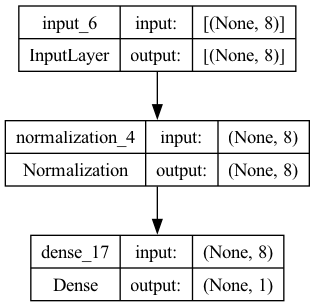

In [78]:
tf.keras.utils.plot_model(model=model, to_file="model.png", show_shapes=True)

### Error measurement, training and optimization (stockastic gradient descent)

In [79]:
model.compile(optimizer=Adam(learning_rate=1),
              loss=MeanAbsoluteError())


In [14]:
history = model.fit(X, Y, epochs=1000, verbose=1)

Epoch 1/1000
32/32 [==============================] - 0s 632us/step - loss: 308505.9375
Epoch 2/1000
32/32 [==============================] - 0s 574us/step - loss: 308473.5000
Epoch 3/1000
32/32 [==============================] - 0s 562us/step - loss: 308441.4688
Epoch 4/1000
32/32 [==============================] - 0s 501us/step - loss: 308409.4688
Epoch 5/1000
32/32 [==============================] - 0s 498us/step - loss: 308377.4062
Epoch 6/1000
32/32 [==============================] - 0s 504us/step - loss: 308345.5312
Epoch 7/1000
32/32 [==============================] - 0s 472us/step - loss: 308313.3750
Epoch 8/1000
32/32 [==============================] - 0s 489us/step - loss: 308281.4062
Epoch 9/1000
32/32 [==============================] - 0s 533us/step - loss: 308249.3750
Epoch 10/1000
32/32 [==============================] - 0s 489us/step - loss: 308217.4688
Epoch 11/1000
32/32 [==============================] - 0s 486us/step - loss: 308185.6875
Epoch 12/1000
32/32 [=========

In [15]:
history.history

{'loss': [308505.9375,
  308473.5,
  308441.46875,
  308409.46875,
  308377.40625,
  308345.53125,
  308313.375,
  308281.40625,
  308249.375,
  308217.46875,
  308185.6875,
  308153.5,
  308121.59375,
  308089.375,
  308057.46875,
  308025.5,
  307993.53125,
  307961.5,
  307929.4375,
  307897.5625,
  307865.5,
  307833.40625,
  307801.46875,
  307769.40625,
  307737.375,
  307705.5625,
  307673.46875,
  307641.46875,
  307609.59375,
  307577.40625,
  307545.3125,
  307513.5625,
  307481.5625,
  307449.53125,
  307417.5,
  307385.65625,
  307353.5625,
  307321.65625,
  307289.4375,
  307257.65625,
  307225.40625,
  307193.59375,
  307161.5,
  307129.625,
  307097.53125,
  307065.46875,
  307033.59375,
  307001.6875,
  306969.40625,
  306937.46875,
  306905.53125,
  306873.5625,
  306841.5,
  306809.4375,
  306777.75,
  306745.4375,
  306713.46875,
  306681.40625,
  306649.625,
  306617.5,
  306585.40625,
  306553.53125,
  306521.5625,
  306489.625,
  306457.46875,
  306425.4375,
  306

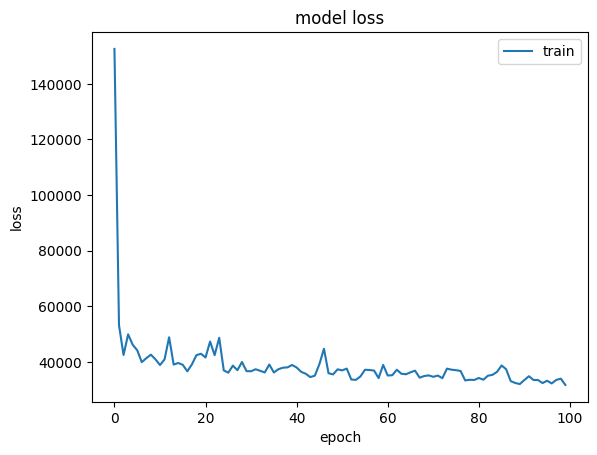

In [80]:
plt.plot(history.history['loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train'])
plt.show()

### Performance measurements

In [81]:
model.compile(optimizer=Adam(learning_rate=1),
              loss=MeanAbsoluteError(),
              metrics=RootMeanSquaredError())


In [18]:
history = model.fit(X, Y, epochs=1000, verbose=1)

Epoch 1/1000
32/32 [==============================] - 0s 637us/step - loss: 276514.1562 - root_mean_squared_error: 303812.9688
Epoch 2/1000
32/32 [==============================] - 0s 580us/step - loss: 276481.7500 - root_mean_squared_error: 303783.4062
Epoch 3/1000
32/32 [==============================] - 0s 557us/step - loss: 276449.9062 - root_mean_squared_error: 303754.1562
Epoch 4/1000
32/32 [==============================] - 0s 506us/step - loss: 276417.8750 - root_mean_squared_error: 303724.7500
Epoch 5/1000
32/32 [==============================] - 0s 481us/step - loss: 276385.9062 - root_mean_squared_error: 303695.5312
Epoch 6/1000
32/32 [==============================] - 0s 484us/step - loss: 276354.0625 - root_mean_squared_error: 303665.4375
Epoch 7/1000
32/32 [==============================] - 0s 495us/step - loss: 276322.0312 - root_mean_squared_error: 303635.3438
Epoch 8/1000
32/32 [==============================] - 0s 465us/step - loss: 276290.0625 - root_mean_squared_err

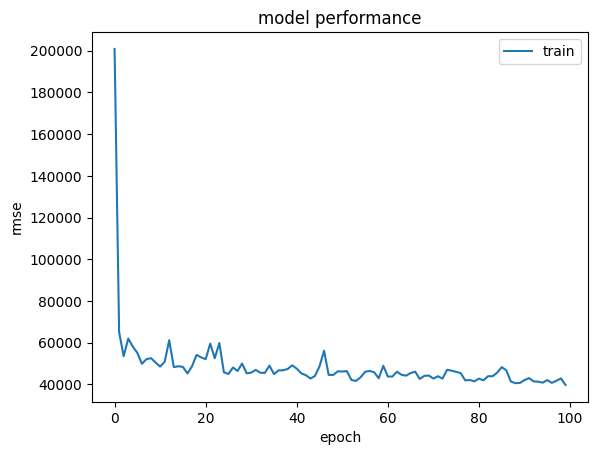

In [82]:
plt.plot(history.history['root_mean_squared_error'])
plt.title("model performance")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.legend(['train'])
plt.show()

In [83]:
history.history

{'loss': [152551.625,
  53209.2890625,
  42541.515625,
  49958.640625,
  46219.4609375,
  44246.3046875,
  39964.62109375,
  41399.03125,
  42651.1953125,
  40980.546875,
  38922.44921875,
  40943.26953125,
  48907.703125,
  39095.21875,
  39662.35546875,
  39010.640625,
  36679.78125,
  39133.546875,
  42479.375,
  42976.23828125,
  41647.484375,
  47362.703125,
  42497.1484375,
  48732.46484375,
  37000.91015625,
  36185.6953125,
  38713.79296875,
  37076.796875,
  40015.03125,
  36742.94921875,
  36691.7265625,
  37414.609375,
  36846.12109375,
  36267.890625,
  39111.03515625,
  36248.1640625,
  37425.41796875,
  37971.046875,
  38081.23046875,
  38935.4375,
  38040.98828125,
  36478.4765625,
  35791.5234375,
  34592.67578125,
  35096.9296875,
  39251.234375,
  44777.63671875,
  35990.82421875,
  35559.75390625,
  37389.09375,
  37001.38671875,
  37650.515625,
  33726.7890625,
  33588.3671875,
  34812.83984375,
  37216.96875,
  37146.69921875,
  36931.578125,
  34233.16015625,
  38

In [84]:
model.evaluate(X, Y)

32/32 [==============================] - 0s 581us/step - loss: 308520.2188 - root_mean_squared_error: 333261.9062


[308520.21875, 333261.90625]

### Validating and testing

In [22]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)  # 80% / 10% / 10%

In [23]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
Y_train = Y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(Y_train.shape)

(800, 8)
(800, 1)


In [24]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
Y_val = Y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(Y_val.shape)

(100, 8)
(100, 1)


In [25]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
Y_test = Y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(Y_test.shape)

(100, 8)
(100, 1)


In [26]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X_train)

<tf.Tensor: shape=(800, 8), dtype=float32, numpy=
array([[-1.486244  , -1.353077  , -1.4208683 , ...,  0.08535445,
         1.0429945 , -1.2977153 ],
       [-0.9079387 ,  0.02789902, -1.4208683 , ..., -0.5311996 ,
         0.4108399 , -1.1089137 ],
       [-0.32963353,  1.5888727 , -0.7126472 , ...,  0.753288  ,
         1.0429945 , -1.0145128 ],
       ...,
       [-1.486244  , -0.87559086,  0.7037949 , ...,  0.08535445,
        -0.61033297, -0.30650666],
       [-1.486244  , -1.512863  ,  1.412016  , ..., -0.6339586 ,
        -1.3397422 ,  0.21269786],
       [ 1.4052821 , -1.6853725 , -0.7126472 , ..., -1.0963742 ,
        -1.1938603 ,  0.16549745]], dtype=float32)>

In [27]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=1000, verbose=1)

Epoch 1/1000
25/25 [==============================] - 0s 2ms/step - loss: 244397.2969 - root_mean_squared_error: 273982.2188 - val_loss: 246591.7344 - val_root_mean_squared_error: 278565.3750
Epoch 2/1000
25/25 [==============================] - 0s 1ms/step - loss: 244372.5625 - root_mean_squared_error: 273959.6250 - val_loss: 246566.8125 - val_root_mean_squared_error: 278542.0000
Epoch 3/1000
25/25 [==============================] - 0s 1ms/step - loss: 244347.4844 - root_mean_squared_error: 273935.8438 - val_loss: 246542.3750 - val_root_mean_squared_error: 278518.5312
Epoch 4/1000
25/25 [==============================] - 0s 1ms/step - loss: 244322.4375 - root_mean_squared_error: 273912.4375 - val_loss: 246518.2812 - val_root_mean_squared_error: 278495.9688
Epoch 5/1000
25/25 [==============================] - 0s 1ms/step - loss: 244297.5625 - root_mean_squared_error: 273889.1562 - val_loss: 246493.8750 - val_root_mean_squared_error: 278473.2812
Epoch 6/1000
25/25 [====================

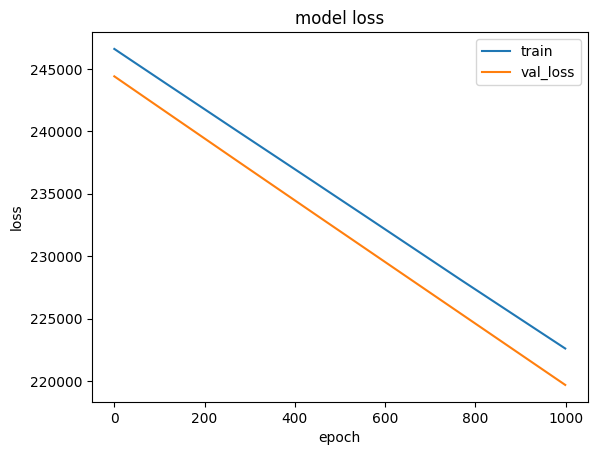

In [28]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'val_loss'])
plt.show()

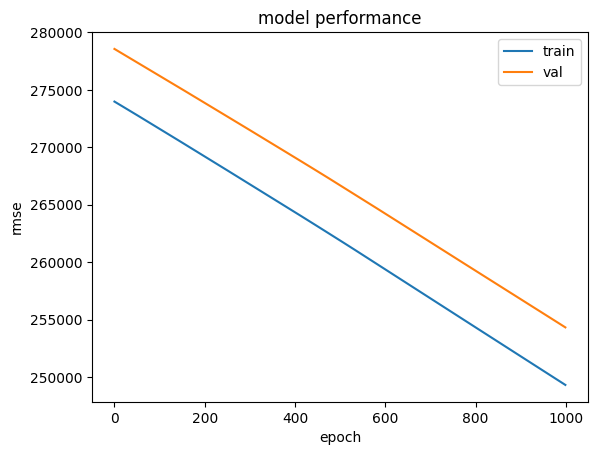

In [29]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title("model performance")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.legend(['train', 'val'])
plt.show()

In [64]:
model.evaluate(X_val, Y_val)

4/4 [==============================] - 0s 1ms/step - loss: 35718.9805 - root_mean_squared_error: 44528.0820


[35718.98046875, 44528.08203125]

In [65]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 1ms/step - loss: 41313.4727 - root_mean_squared_error: 53425.5781


[41313.47265625, 53425.578125]

In [66]:
Y_pred = model.predict(X_test)[0]


4/4 [==============================] - 0s 827us/step


In [67]:
Y_true = list(Y_test[:,0].numpy())

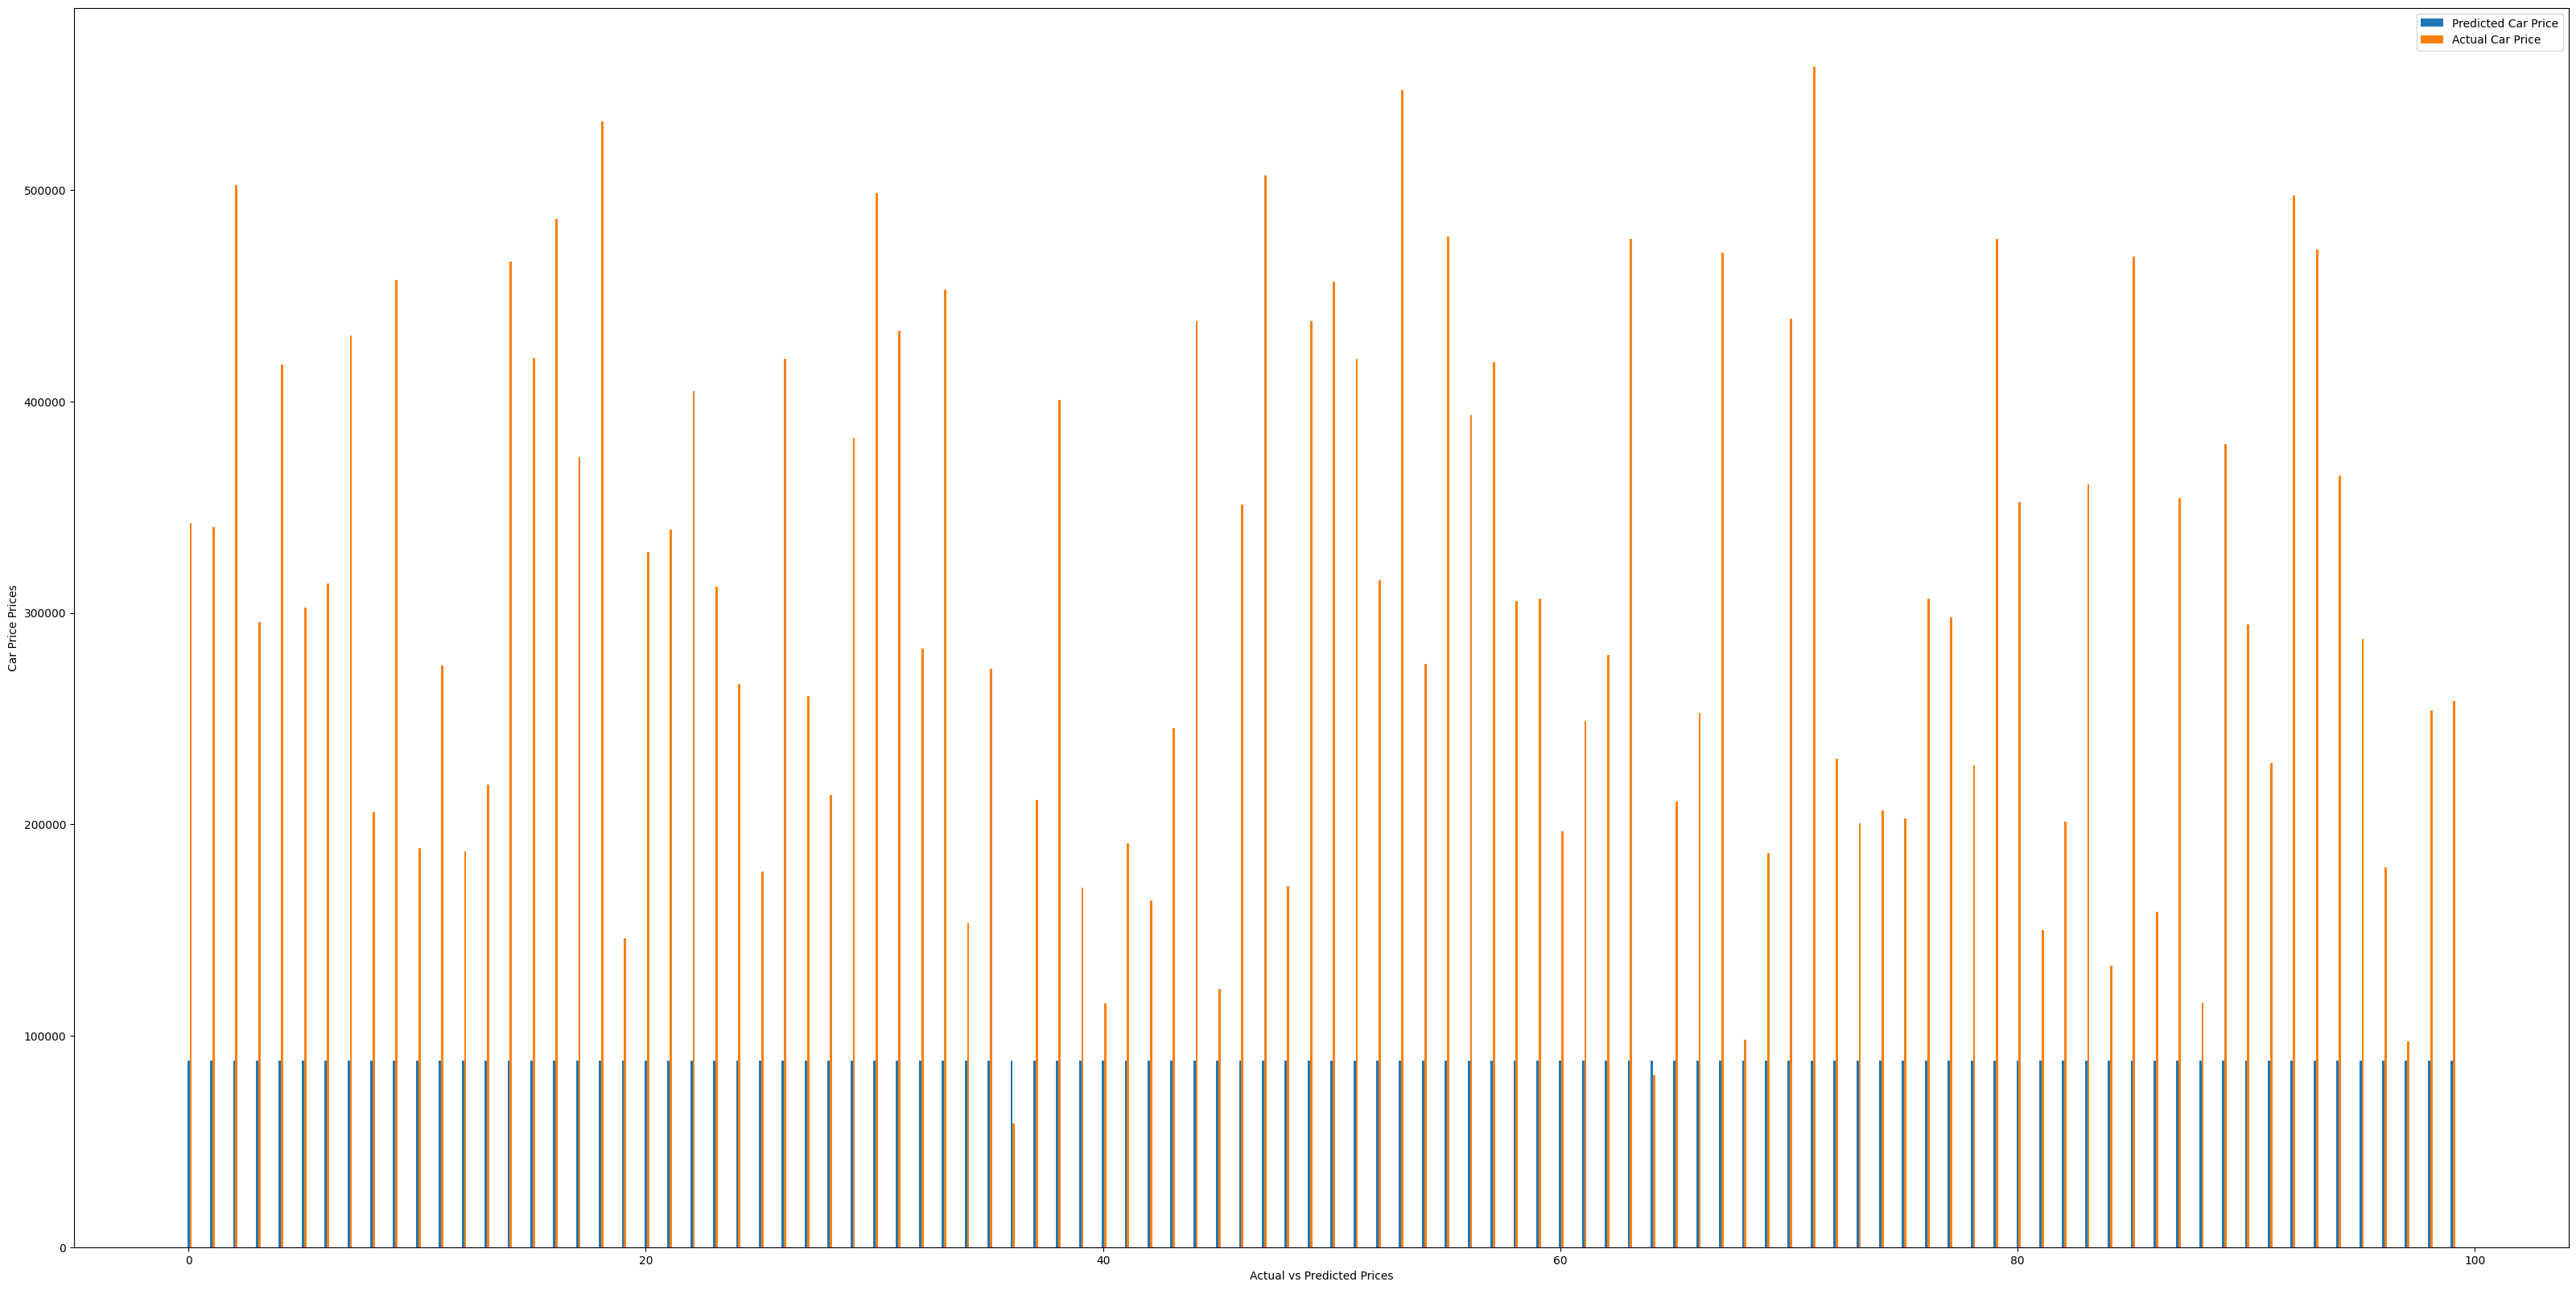

In [34]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, Y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, Y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.legend()
plt.show()

As we can see, the performance is shit now.

### Corrective measures

In [85]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1),
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_18 (Dense)            (None, 128)               1152      
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                      

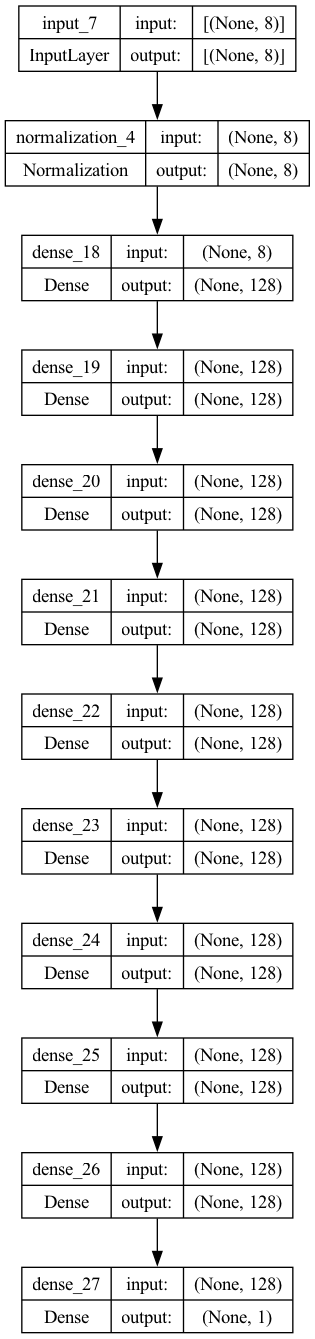

In [86]:
tf.keras.utils.plot_model(model=model, to_file="model.png", show_shapes=True)

In [88]:
model.compile(optimizer=Adam(learning_rate=0.05),
              loss=MeanAbsoluteError(),
              metrics=RootMeanSquaredError())

In [89]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=2000, verbose=1)

Epoch 1/2000
25/25 [==============================] - 1s 5ms/step - loss: 276955.5312 - root_mean_squared_error: 325033.6875 - val_loss: 114969.2969 - val_root_mean_squared_error: 145030.5938
Epoch 2/2000
25/25 [==============================] - 0s 2ms/step - loss: 125829.1797 - root_mean_squared_error: 161001.4375 - val_loss: 71922.5234 - val_root_mean_squared_error: 95944.9688
Epoch 3/2000
25/25 [==============================] - 0s 2ms/step - loss: 67399.8281 - root_mean_squared_error: 85781.2344 - val_loss: 50549.0859 - val_root_mean_squared_error: 63292.3516
Epoch 4/2000
25/25 [==============================] - 0s 3ms/step - loss: 47422.8984 - root_mean_squared_error: 58802.2695 - val_loss: 43165.4883 - val_root_mean_squared_error: 54944.9414
Epoch 5/2000
25/25 [==============================] - 0s 3ms/step - loss: 52520.9961 - root_mean_squared_error: 64888.4023 - val_loss: 52790.3711 - val_root_mean_squared_error: 63826.5781
Epoch 6/2000
25/25 [==============================] - 

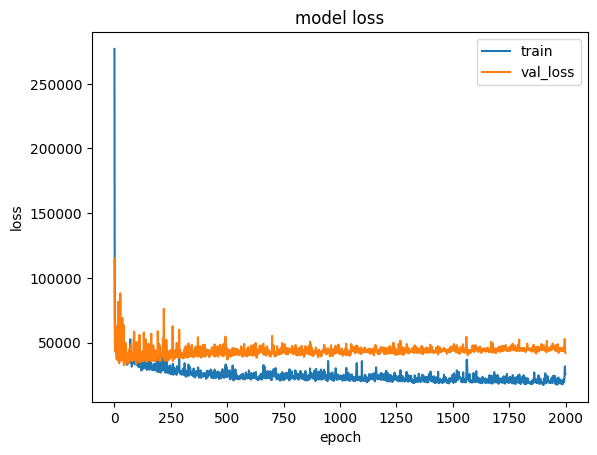

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

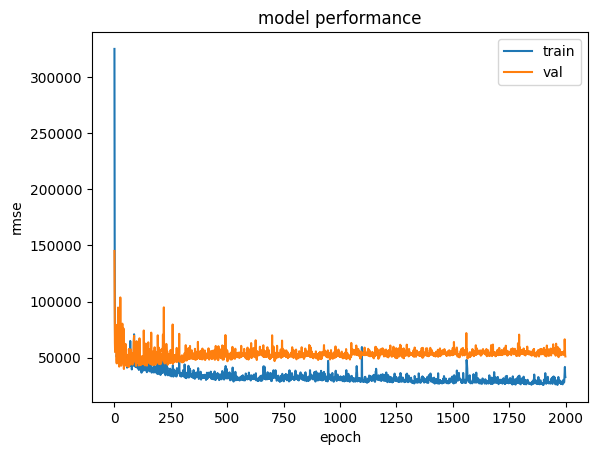

In [93]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [94]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 1ms/step - loss: 48726.0703 - root_mean_squared_error: 62071.7812


[48726.0703125, 62071.78125]

In [100]:
model.predict(tf.expand_dims(X_test[1], axis = 0 ))

1/1 [==============================] - 0s 13ms/step


array([[400173.7]], dtype=float32)

In [101]:
Y_test[1]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([340777.], dtype=float32)>

In [102]:
y_true = list(Y_test[:,0].numpy())

In [103]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 926us/step
[306974.28, 400173.7, 473098.28, 217784.14, 504588.06, 329344.16, 249148.22, 409337.56, 254583.4, 461165.0, 191977.8, 196781.56, 173442.39, 187203.36, 499411.72, 372773.9, 447937.84, 481090.78, 501854.22, 203335.78, 334957.5, 457073.22, 362998.47, 392340.38, 308750.3, 213197.86, 427715.4, 251670.06, 257774.42, 324940.03, 433418.84, 371338.94, 304400.2, 440347.5, 193171.31, 273254.12, 154714.4, 265444.22, 413353.16, 288110.53, 109232.92, 217446.98, 141864.44, 195197.4, 402307.38, 197142.88, 368939.66, 493211.0, 109232.92, 578331.06, 442792.38, 323349.28, 297199.1, 554219.44, 109232.92, 414454.47, 342490.4, 508292.8, 180752.28, 247081.39, 167734.94, 240571.72, 180311.5, 379655.3, 118316.56, 240393.89, 195801.39, 588774.1, 208840.75, 255481.86, 439034.53, 514744.84, 240352.31, 229205.58, 231085.08, 177149.67, 424063.56, 330629.8, 248214.52, 452675.3, 294417.75, 124285.67, 171758.5, 463643.4, 109232.92, 434852.62, 109232.92, 390578.3, 16

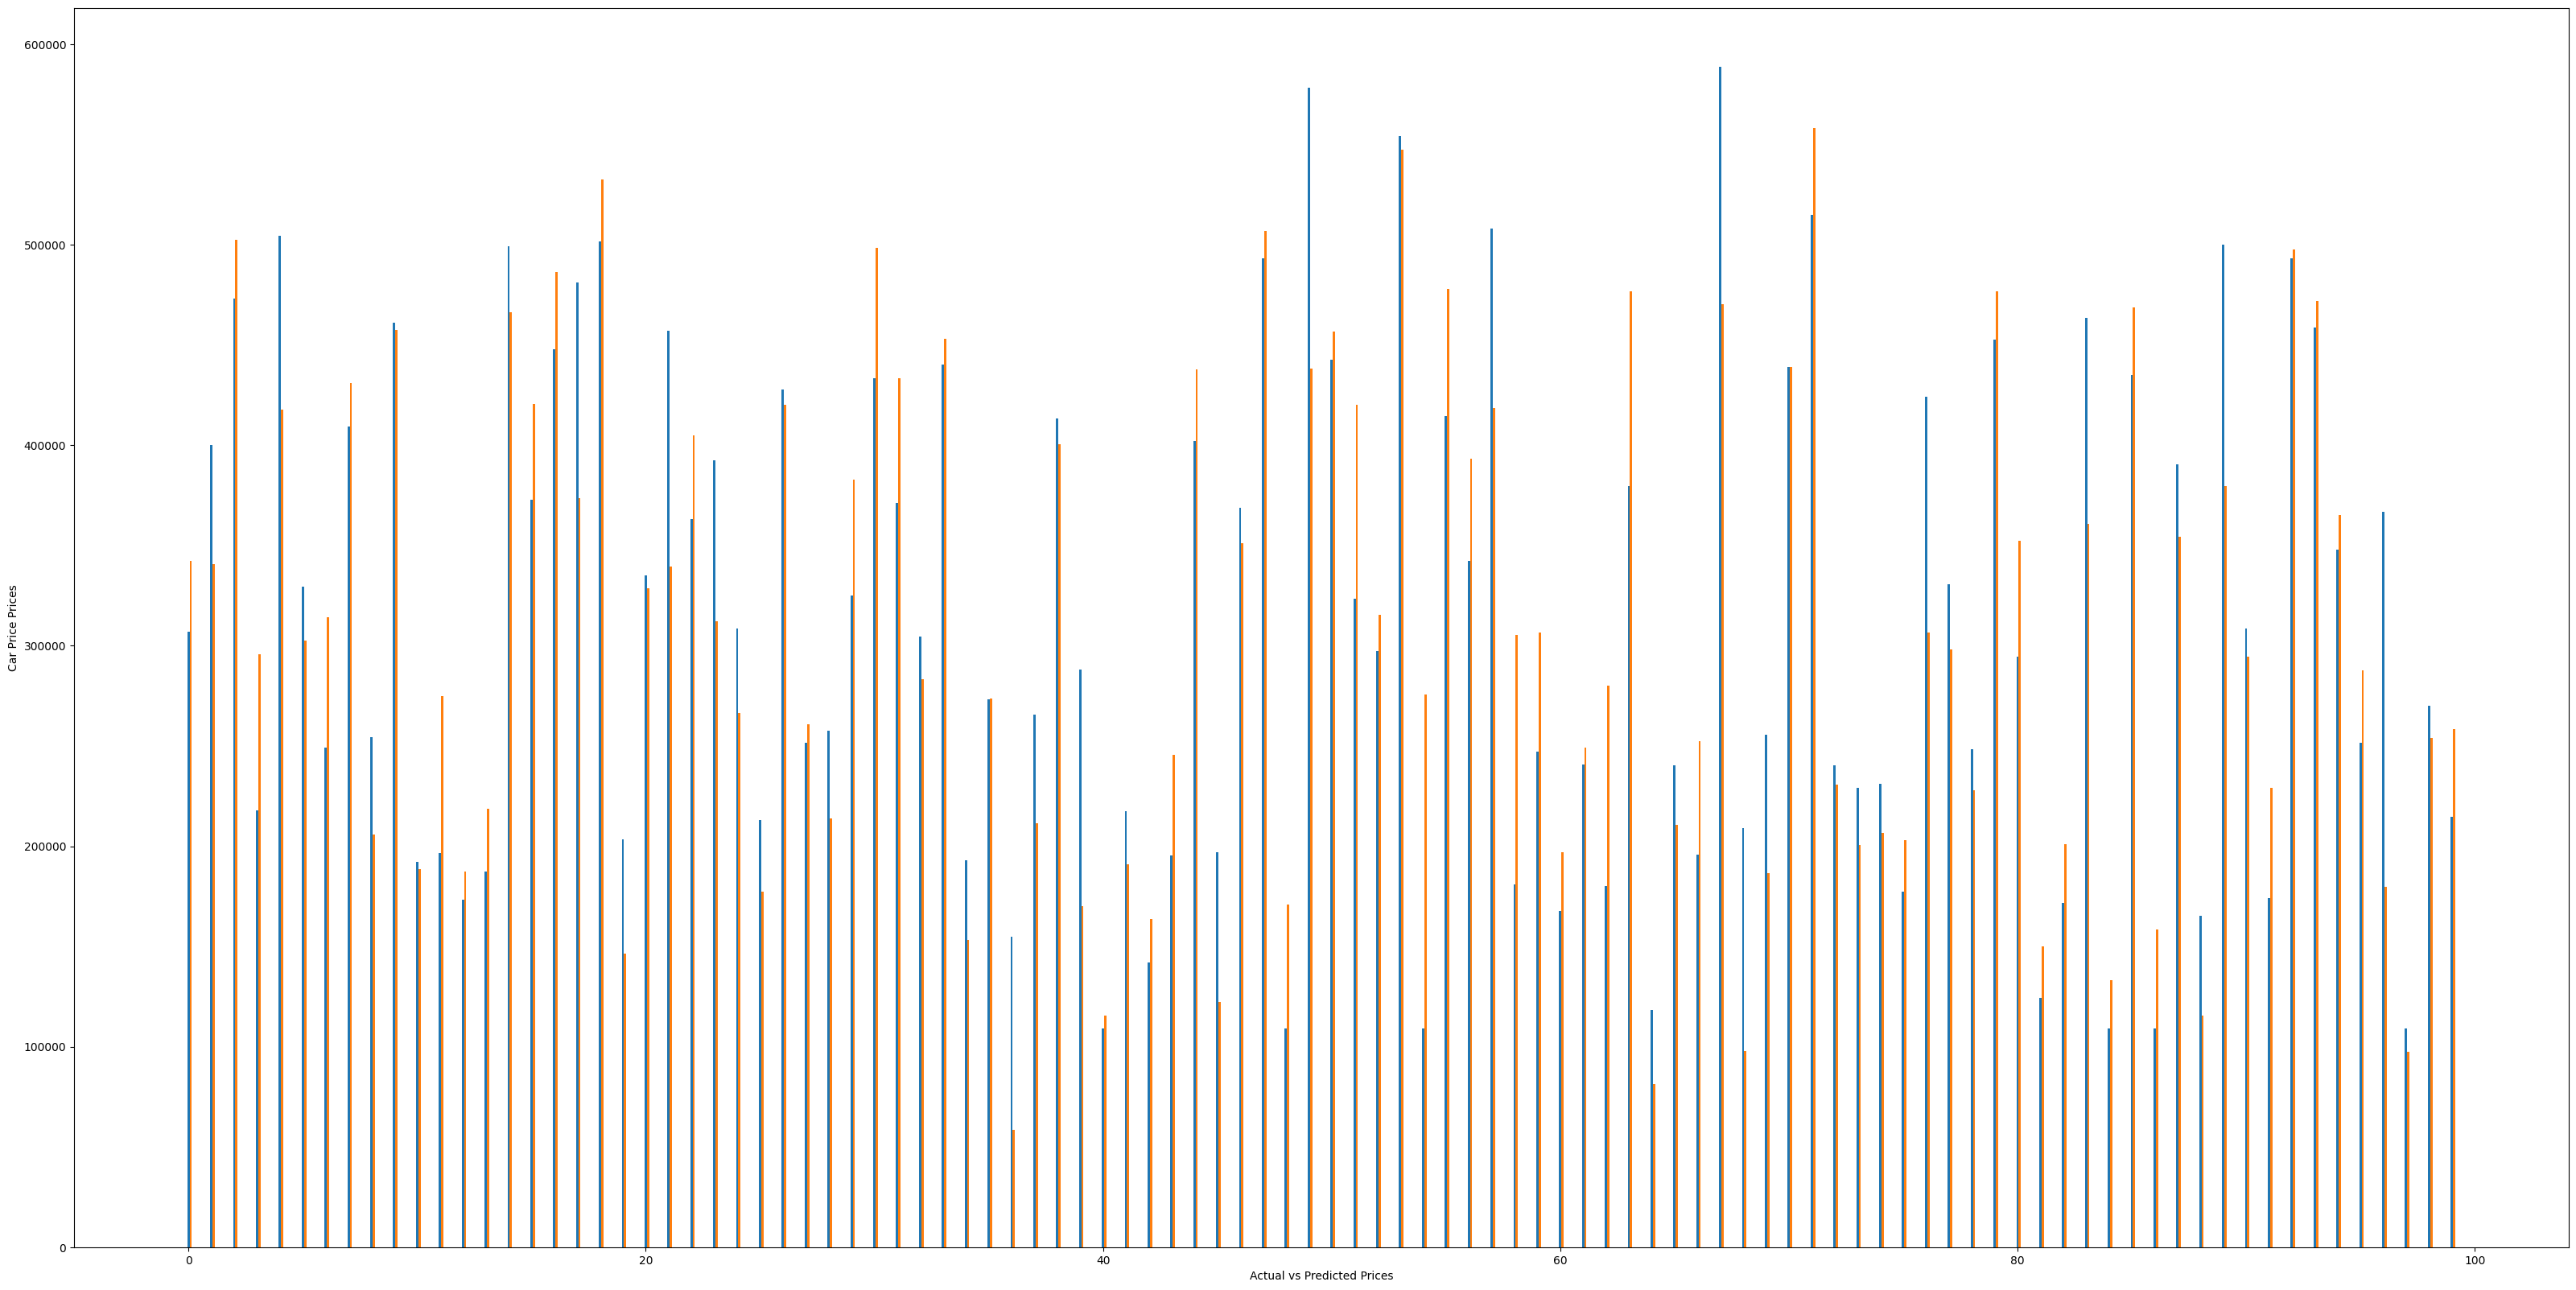

In [104]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()

### Computing optimization

In [105]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [106]:
for x, y in train_dataset:
    print(x,y)
    break

tf.Tensor(
[[2.00000e+00 1.06506e+05 3.00000e+00 9.00000e+00 1.00000e+01 1.74000e+02
  1.06000e+02 1.20000e+02]
 [2.00000e+00 7.72500e+04 2.00000e+00 8.00000e+00 1.50000e+01 1.84000e+02
  1.14000e+02 1.01000e+02]
 [3.00000e+00 1.00966e+05 1.00000e+00 5.00000e+00 1.10000e+01 1.57000e+02
  9.30000e+01 8.00000e+01]
 [4.00000e+00 1.45992e+05 2.00000e+00 7.00000e+00 1.20000e+01 1.82000e+02
  1.06000e+02 8.20000e+01]
 [7.00000e+00 6.03450e+04 3.00000e+00 9.00000e+00 1.20000e+01 1.83000e+02
  9.40000e+01 9.90000e+01]
 [4.00000e+00 7.97990e+04 4.00000e+00 6.00000e+00 1.40000e+01 1.66000e+02
  8.40000e+01 1.21000e+02]
 [3.00000e+00 1.10247e+05 4.00000e+00 7.00000e+00 1.40000e+01 1.40000e+02
  7.30000e+01 1.24000e+02]
 [4.00000e+00 6.09170e+04 1.00000e+00 6.00000e+00 1.00000e+01 1.51000e+02
  1.00000e+02 6.90000e+01]
 [2.00000e+00 6.11320e+04 1.00000e+00 2.00000e+00 9.00000e+00 1.69000e+02
  1.06000e+02 7.60000e+01]
 [2.00000e+00 1.15616e+05 1.00000e+00 3.00000e+00 9.00000e+00 1.41000e+02
  1.01

In [107]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
val_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE) 

In [108]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))
test_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [111]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=1000, verbose=1)

Epoch 1/1000
25/25 [==============================] - 0s 2ms/step - loss: 18330.5117 - root_mean_squared_error: 26993.8125 - val_loss: 18949.5859 - val_root_mean_squared_error: 27462.0781
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 20076.7227 - root_mean_squared_error: 28033.9551 - val_loss: 18266.5469 - val_root_mean_squared_error: 26312.6094
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 19108.5625 - root_mean_squared_error: 27335.4746 - val_loss: 18848.1777 - val_root_mean_squared_error: 26472.8125
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 19699.9922 - root_mean_squared_error: 28062.1680 - val_loss: 17497.4805 - val_root_mean_squared_error: 25404.2344
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 20892.3438 - root_mean_squared_error: 28462.5996 - val_loss: 17134.5391 - val_root_mean_squared_error: 25461.2871
Epoch 6/1000
25/25 [==============================] - 0s 2ms

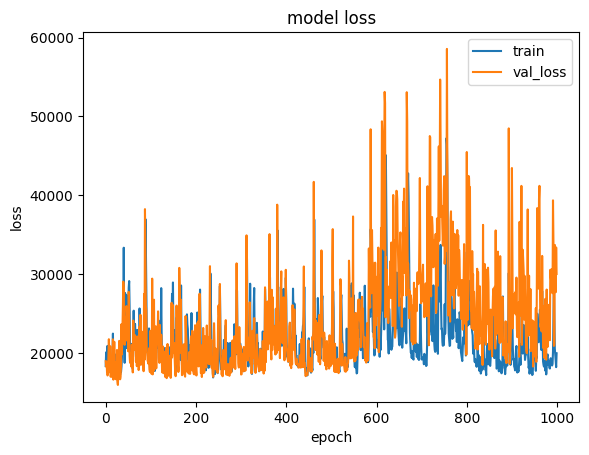

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

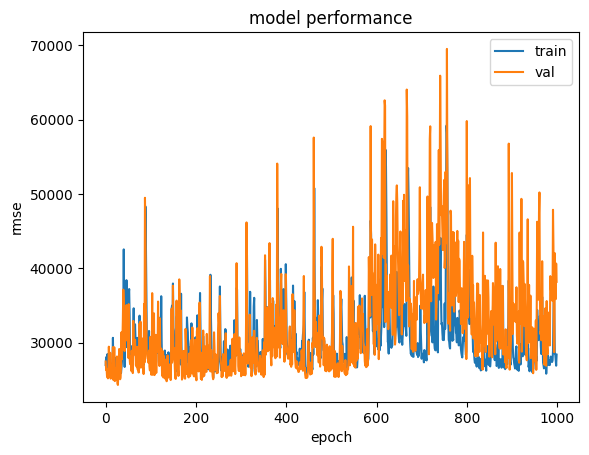

In [113]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [115]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 1ms/step - loss: 55581.1641 - root_mean_squared_error: 76415.8125


[55581.1640625, 76415.8125]

In [116]:
y_true = list(Y_test[:,0].numpy())

In [117]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 1ms/step
[342420.9, 494608.72, 535855.56, 204913.94, 517013.4, 380274.06, 282401.0, 506222.53, 262512.62, 525143.75, 214935.36, 202631.33, 182197.42, 195236.77, 475632.28, 408071.9, 501673.7, 527033.06, 490470.25, 224403.06, 323056.0, 501422.38, 375005.56, 370028.25, 343355.97, 206752.73, 451621.38, 268977.9, 291521.72, 344536.34, 492609.47, 390236.2, 334786.44, 505674.22, 193867.88, 333504.66, 112650.9, 260240.22, 457409.94, 287587.7, 112650.9, 197280.73, 112650.9, 217356.36, 387042.1, 255176.33, 372425.25, 543190.8, 112650.9, 704225.6, 464387.7, 395336.34, 284538.25, 608531.9, 112650.9, 458521.3, 349935.03, 505740.66, 165447.36, 253180.23, 196936.12, 209542.95, 193665.81, 473829.8, 112650.9, 247300.89, 229231.83, 642523.25, 173715.16, 212820.9, 481744.0, 496652.84, 238062.64, 252576.86, 261874.38, 196699.53, 531823.6, 325360.72, 223637.11, 478460.78, 321337.75, 136339.28, 152728.86, 514796.28, 112650.9, 400041.0, 112650.9, 438898.4, 174213.27

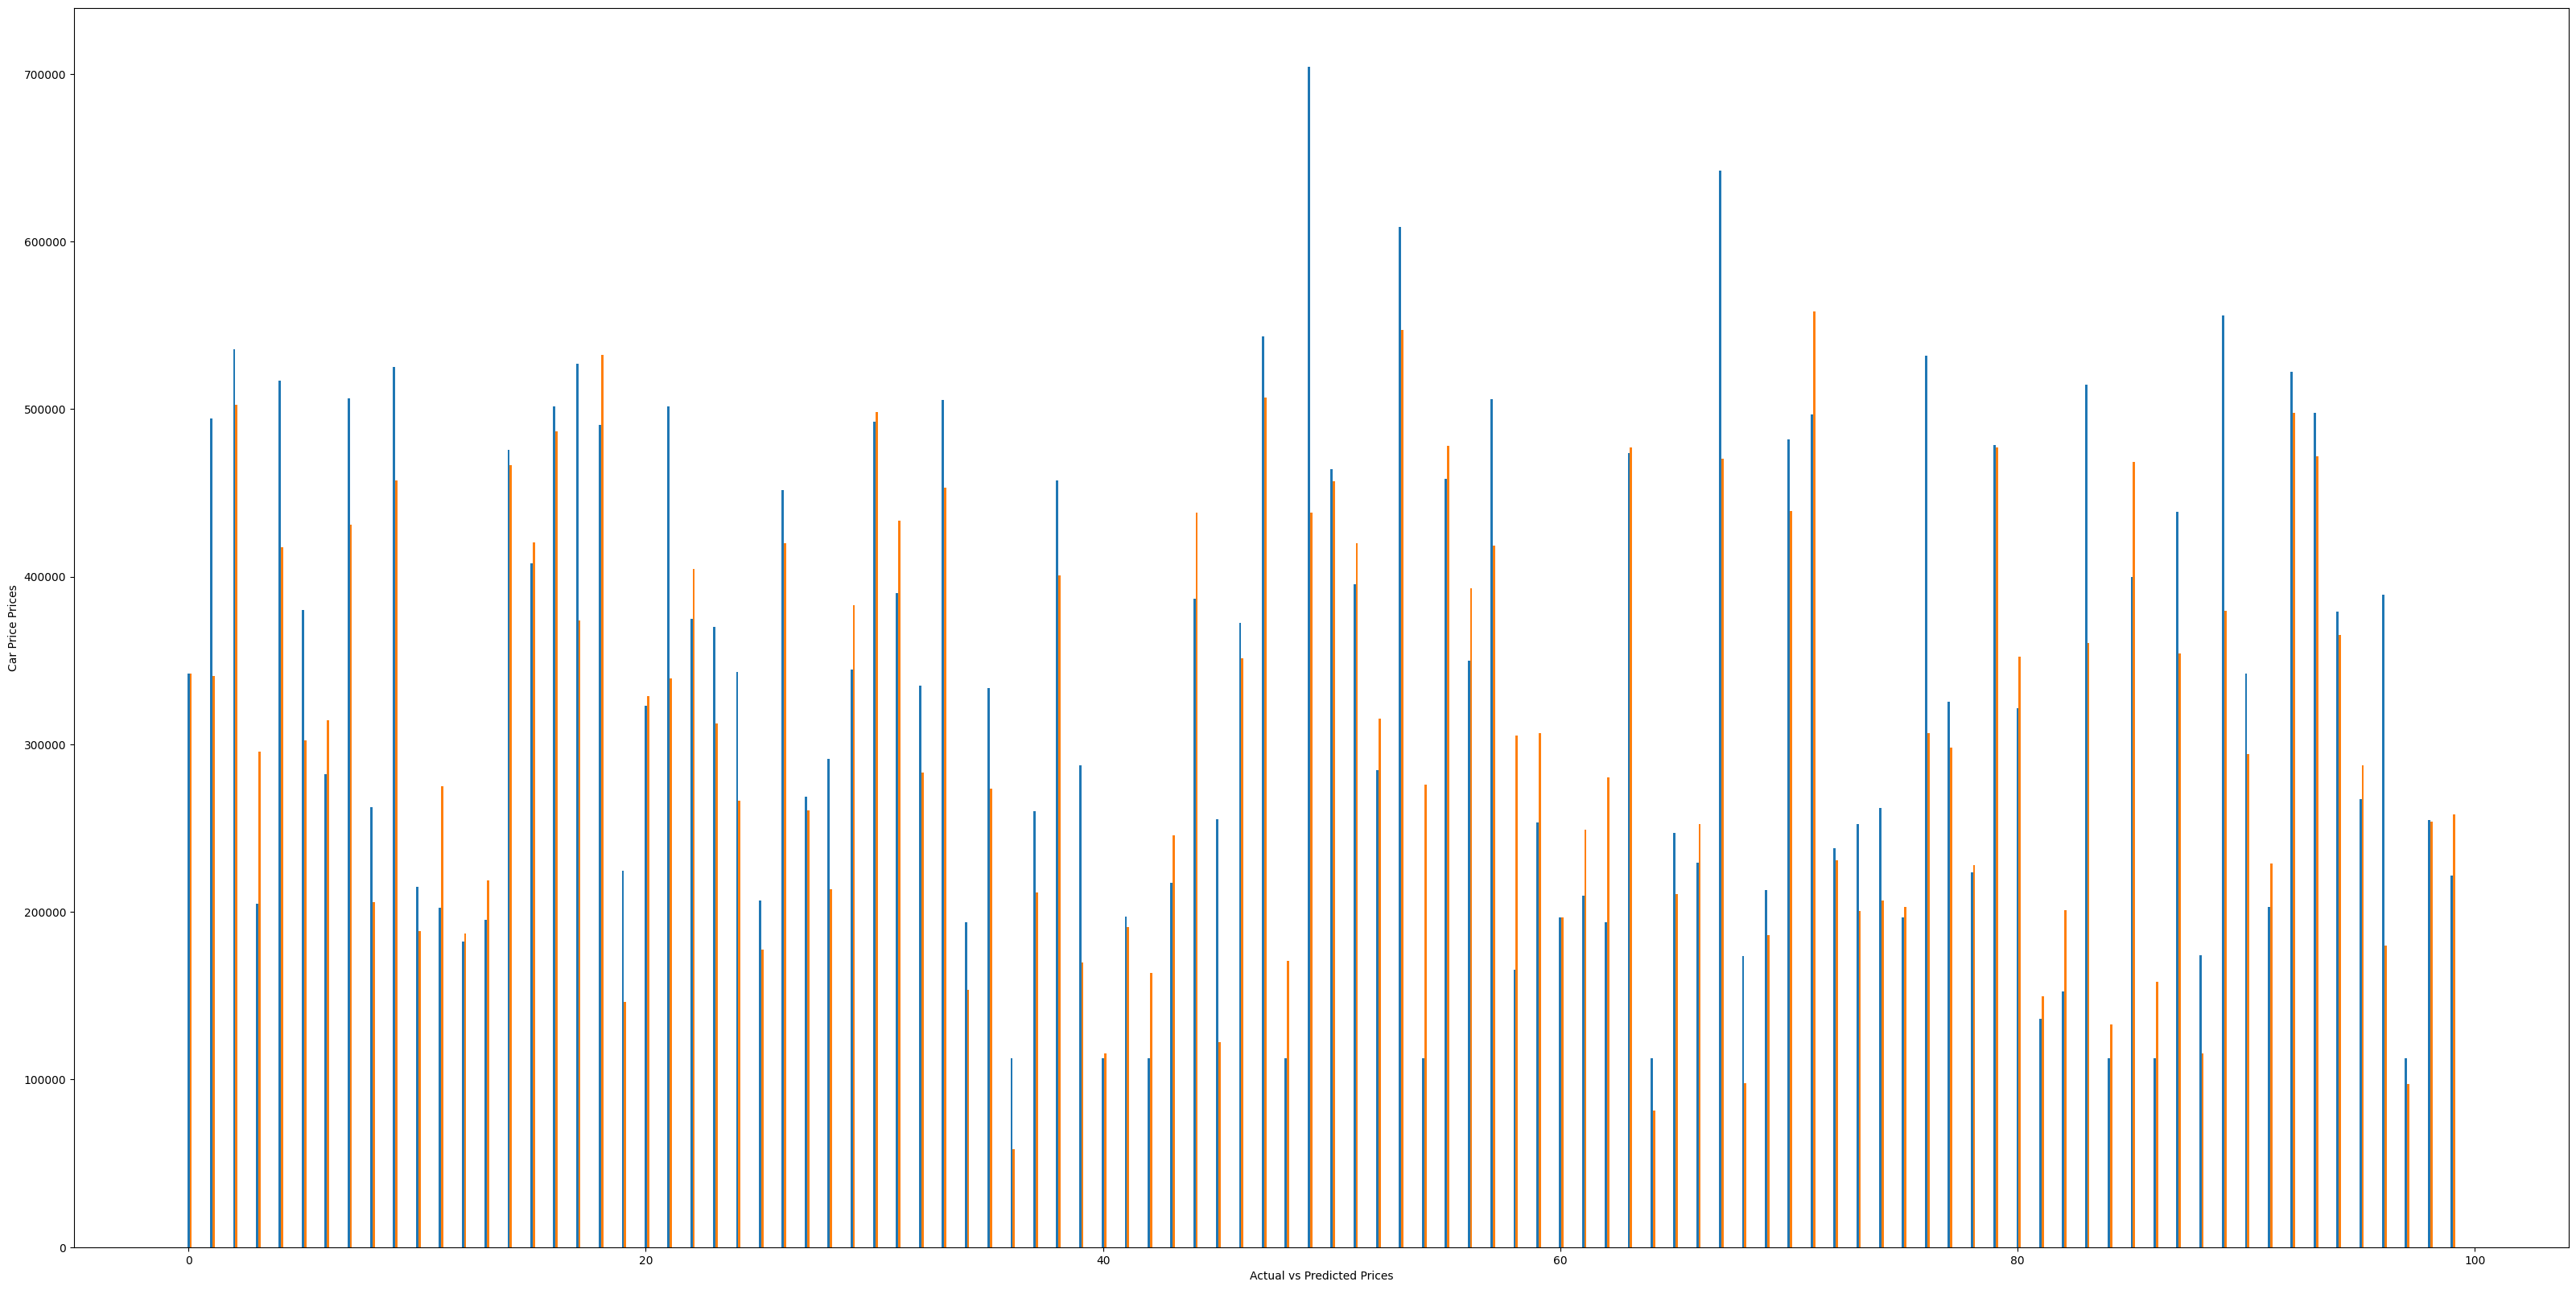

In [118]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()